> # # **PROYECTO: RECOMENDACIÓN DE PRODUCTOS BANCARIOS A CLIENTES**

![](http://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Santander_Argentina_Logo.png/1200px-Santander_Argentina_Logo.png)


> # **EQUIPO DE TRABAJO**
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQh9_i7yEc-BPq9RSjtEBNgZ4rV-rnYWPhVu3Vvoik6lCsJ8372Bm_iF1ovcYv85Mm8o98&usqp=CAU)

# *  Magalí Estefanía Gonzalez
# * Héctor Guillermo Maristany

**Link a GitHub:** 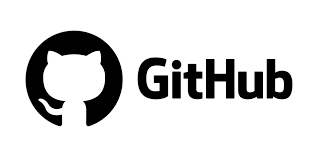

**https://github.com/GonzalezMaristany/Proyecto-Recomendacion-de-productos-bancarios**

> # **Sección 6: DESARROLANDO UN MODELO DE MACHINE LEARNING**
![](https://cdn-icons-png.flaticon.com/512/2103/2103652.png)

# **Se utilizarán cinco algoritmos de clasificación:**

* **Logistic Regression**
* **Multinomial NB**
* **Random Forest Classifier**
* **Light GBM**
* **XGBoost**

**A continuación se presentan las pros y contras de los cuatro modelos de estudio**

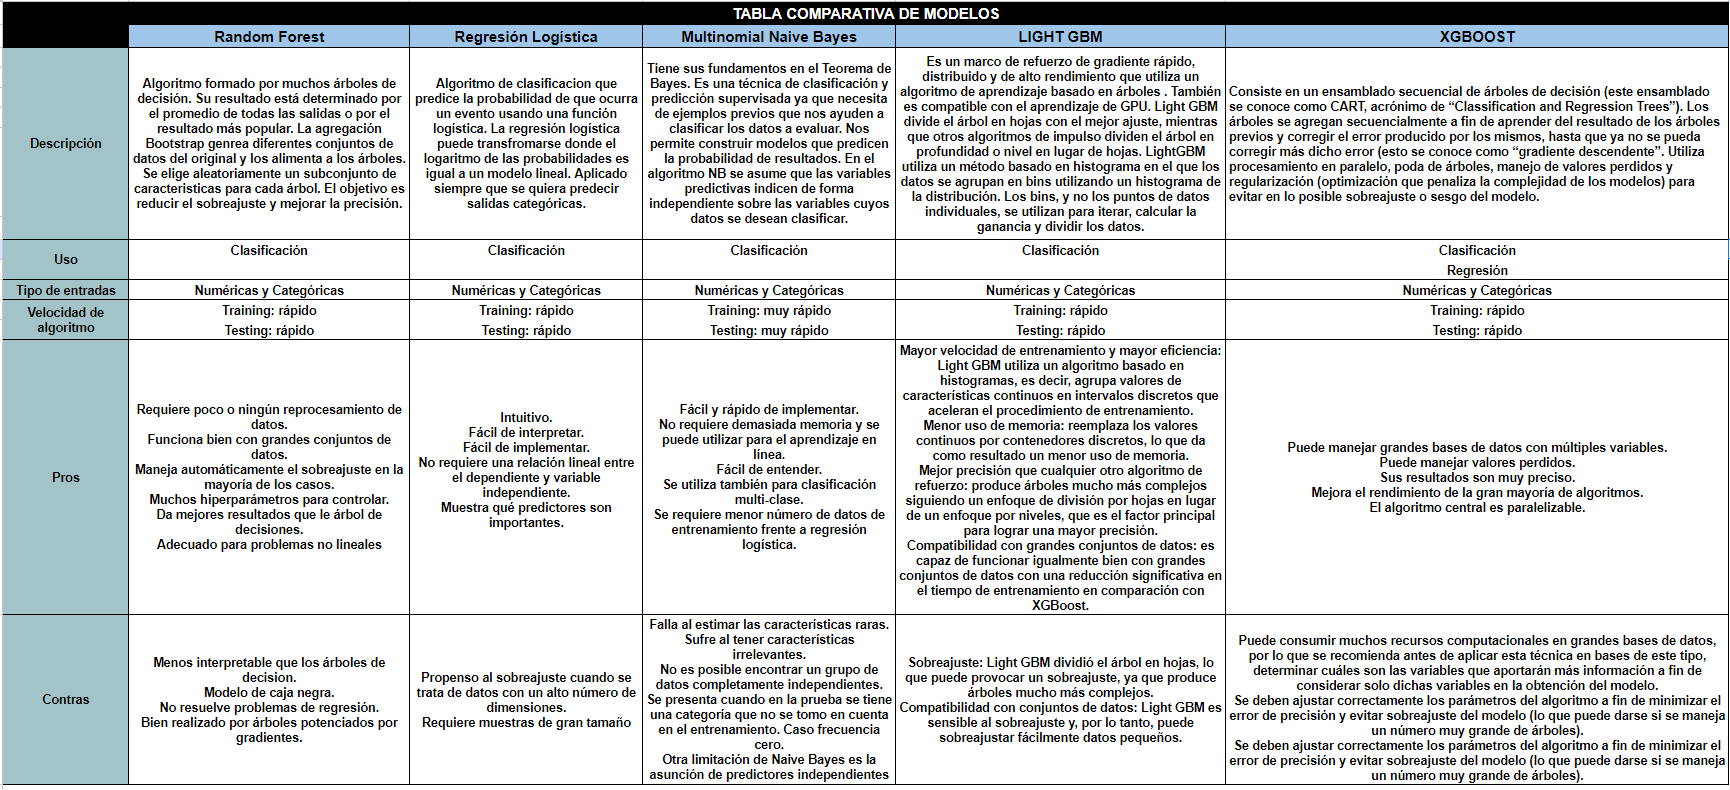

# **PREPARACIÓN DE LOS DATOS PARA EL MODELADO**

**IMPORTACIÓN DE LIBRERÍAS**

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Tratamiento de datos
import numpy as np                    
import pandas as pd
!pip install prettytable
from prettytable import PrettyTable
import warnings
# Gráficos
import matplotlib as mpl              # Importar MatPlotLib
import matplotlib.pyplot as plt # El modulo Pyplot de Matplotlib
!pip install seaborn
import seaborn as sns                 # Importar Seaborn
#from sklearn.preprocessing import scale
!pip install scikit-learn
from sklearn import preprocessing  # Import label encoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split #para separar en train y test
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
!pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance
# Modelos de Clasificacion:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
# MULTINOMIAL NAVES BAYES
from sklearn.naive_bayes import MultinomialNB
# LIGHT GBM
!pip install lightgbm
import lightgbm as lgb
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
# XGBOOST
!pip install xgboost
import xgboost 
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from xgboost import plot_importance
# Métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print('¡Librerías importadas con éxito!')

/kaggle/input/santander-product-recommendation/test_ver2.csv.zip
/kaggle/input/santander-product-recommendation/sample_submission.csv.zip
/kaggle/input/santander-product-recommendation/train_ver2.csv.zip
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 5.8 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 52.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 22.0 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 3.5 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB

**LECTURA DEL DATASET**

In [ ]:
#Lectura de dataset (archivo csv)
clientes = pd.read_csv('/kaggle/input/santander-product-recommendation/train_ver2.csv.zip', header=0)
# Muestra de las diez primeras filas del dataset
clientes.head(10)

/tmp/ipykernel_14/190704024.py:2: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  clientes = pd.read_csv('/kaggle/input/santander-product-recommendation/train_ver2.csv.zip', header=0)


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


**PREPROCESAMIENTO DE DATOS PARA MODELADO SEGÚN LO DEFINIDO EN LA SECCIÓN DE LIMPIEZA Y TRANSFORMACIÓN**

In [ ]:
#PRIMER PASO: LIMPIEZA DE NULOS
#-------------------------------
# columnas conyuemp y ult_fec_cli_1t
clientes.drop(['conyuemp', 'ult_fec_cli_1t'],axis=1, inplace=True)
# columna renta
clientes.loc[clientes["renta"].isnull(),"renta"] = np.nanmedian(clientes.renta)
# columna segmento
clientes.loc[clientes["segmento"].isnull(),"segmento"] = '02 - PARTICULARES'
# columna canal_entrada
clientes.loc[clientes["canal_entrada"].isnull(),"canal_entrada"] = 'KHE'
# columna indrel_1mes
clientes["indrel_1mes"] = clientes["indrel_1mes"].map(lambda x: 5.0 if x == "P" else x).astype(float).fillna(0.0).astype(np.int8)
# columna tiprel_1mes
clientes.loc[clientes["tiprel_1mes"].isnull(),"tiprel_1mes"] = 'I'
# columna nomprov
clientes.loc[clientes["nomprov"].isnull(),"nomprov"] = 'MADRID'
# columna cod_prov
clientes.drop(['cod_prov'],axis=1, inplace=True)
# columna sexo
clientes.loc[clientes["sexo"].isnull(),"sexo"] = 'V'
# columna tipodom
clientes.drop(['tipodom'],axis=1, inplace=True)
#columna indfall
clientes["indfall"].fillna('N', inplace=True)
# columna indext
clientes["indext"].fillna('N', inplace=True)
# columna ind_actividad_cliente
clientes["ind_actividad_cliente"].fillna(0.0, inplace=True)
# columna indresi
clientes["indresi"].fillna('S', inplace=True)
# columna indrel
clientes["indrel"].fillna(1.0, inplace=True)
# columna ind_nuevo
clientes["ind_nuevo"].fillna(0.0, inplace=True)
# columna fecha_alta
cust_ids = clientes[clientes.fecha_alta.isnull()]['ncodpers']
tmp = clientes[clientes.ncodpers.isin(cust_ids)].groupby(['ncodpers', 'fecha_dato']).size().to_frame()
tmp.reset_index(level=[0,1], inplace=True)
tmp.columns=['ncodpers', 'fecha_dato','Count']
tmp.drop(columns='Count', inplace=True)
tmp = tmp.join(tmp.groupby('ncodpers')['fecha_dato'].agg(['min', 'max']), on='ncodpers')
tmp.drop(['fecha_dato'], axis = 1, inplace=True)
tmp.drop_duplicates(keep='first', inplace=True)
tmp.rename(index=str, columns={"ncodpers": "ncodpers", "min": "Min_fecha_dato", "max":"Max_fecha_dato"}, inplace=True)
# columna fecha_alta
clientes = clientes.merge(tmp, on='ncodpers', how = 'outer')
clientes.loc[clientes.fecha_alta.isnull(), 'fecha_alta'] = clientes.Min_fecha_dato
clientes.drop(columns=['Min_fecha_dato', 'Max_fecha_dato'], inplace=True)
# columna pais_residencia
clientes.loc[clientes["pais_residencia"].isnull(),"pais_residencia"] = 'ES'
# columna ind_empleado
clientes.loc[clientes["ind_empleado"].isnull(),"ind_empleado"] = "N"
# columnas ind_nomina_ult1 y ind_nom_pens_ult1
clientes["ind_nomina_ult1"].fillna(0.0, inplace=True)
clientes["ind_nom_pens_ult1"].fillna(0.0, inplace=True)
#----------------------------------------------------------
#SEGUNDO PASO: TRANSFORMACION DE DATOS
#----------------------------------------------------------
#columna age
clientes['age'] = pd.to_numeric(clientes.age, errors='coerce')
clientes = clientes[((clientes["age"] > 15) & (clientes["age"] < 100))]
#columnas ind_ahor_fin_ult1 e ind_aval_fin_ult1
clientes.drop(columns=['ind_ahor_fin_ult1', 'ind_aval_fin_ult1'],inplace = True)
#variable fecha_dato
clientes['fecha_dato'] = clientes['fecha_dato'].replace('-','',regex=True).str.strip(' ,')
clientes['fecha_dato'] = clientes['fecha_dato'].astype("float64")
#variable fecha_alta
clientes['fecha_alta'] = clientes['fecha_alta'].replace('-','',regex=True).str.strip(' ,')
clientes['fecha_alta'] = clientes['fecha_alta'].astype("float64")
#variable antiguedad
clientes["antiguedad"] = pd.to_numeric(clientes["antiguedad"],errors = 'coerce')
#------------------------------------------------------------
#TERCER PASO: TRANSFORMAMOS COLUMNAS CATEGÓRICAS A NUMÉRICAS CON LABELENCODER
#------------------------------------------------------------
cat_columns = clientes.select_dtypes(include='object').columns
from sklearn.preprocessing import OrdinalEncoder

#generacion del encoder 
le = OrdinalEncoder(handle_unknown='use_encoded_value' , #use cuando tenes valores desconocidos 
                    unknown_value=-1) # asignacion a valores desconocidos 

# generacion de numeros por cada categorico 
le.fit(clientes[cat_columns])

#transformacion de las categoricas en train dataset
clientes[cat_columns] = le.transform(clientes[cat_columns])
#--------------------------------------------------------------
#CUARTO PASO: LIMPIEZA DE OUTLIERS
#--------------------------------------------------------------
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.05) 
K =iso.fit_predict(clientes)
K
clientes["outliers"] = K
clientes = clientes.loc[clientes["outliers"] != -1, :]
clientes = clientes.drop(columns=['outliers']) 
#---------------------------------------------------------------
#QUINTO PASO: BORRADO DE COLUMNAS SEGÚN LO OBTENIDO EN FEATURE SELECCION
#----------------------------------------------------------------
clientes.drop(columns=['pais_residencia', 'antiguedad','nomprov'],inplace = True)
print("listo")

/usr/local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


listo


In [ ]:
#chequeo que no hayan quedado nulos
clientes.isnull().sum()

fecha_dato               0
ncodpers                 0
ind_empleado             0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
indrel                   0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
canal_entrada            0
indfall                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_fin_ult1        0
ind_fond_fin_ult1        0
ind_hip_fin_ult1         0
ind_plan_fin_ult1        0
ind_pres_fin_ult1        0
ind_reca_fin_ult1        0
ind_tjcr_fin_ult1        0
ind_valo_fin_ult1        0
ind_viv_fin_ult1         0
ind_nomina_ult1          0
i

In [ ]:
#chequeo de que todas las columnas sean numéricas
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12833144 entries, 0 to 13647307
Data columns (total 39 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             float64
 1   ncodpers               int64  
 2   ind_empleado           float64
 3   sexo                   float64
 4   age                    float64
 5   fecha_alta             float64
 6   ind_nuevo              float64
 7   indrel                 float64
 8   indrel_1mes            int8   
 9   tiprel_1mes            float64
 10  indresi                float64
 11  indext                 float64
 12  canal_entrada          float64
 13  indfall                float64
 14  ind_actividad_cliente  float64
 15  renta                  float64
 16  segmento               float64
 17  ind_cco_fin_ult1       int64  
 18  ind_cder_fin_ult1      int64  
 19  ind_cno_fin_ult1       int64  
 20  ind_ctju_fin_ult1      int64  
 21  ind_ctma_fin_ult1      int64  
 22  ind_ctop_fin_ult1    

In [ ]:
#se exporta a csv el dataset 
clientes.to_csv('clientes_modelado.csv',header=True,index=False)

In [ ]:
clientes_modelado=pd.read_csv('clientes_modelado.csv', header=0)
clientes_modelado.head()

,fecha_dato,ncodpers,ind_empleado,sexo,age,fecha_alta,ind_nuevo,indrel,indrel_1mes,tiprel_1mes,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,20150128.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,20150228.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,20150328.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,20150428.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,20150528.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,1


In [ ]:
clientes_modelado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833143 entries, 0 to 12833142
Data columns (total 39 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             float64
 1   ncodpers               int64  
 2   ind_empleado           float64
 3   sexo                   float64
 4   age                    float64
 5   fecha_alta             float64
 6   ind_nuevo              float64
 7   indrel                 float64
 8   indrel_1mes            int64  
 9   tiprel_1mes            float64
 10  indresi                float64
 11  indext                 float64
 12  canal_entrada          float64
 13  indfall                float64
 14  ind_actividad_cliente  float64
 15  renta                  float64
 16  segmento               float64
 17  ind_cco_fin_ult1       int64  
 18  ind_cder_fin_ult1      int64  
 19  ind_cno_fin_ult1       int64  
 20  ind_ctju_fin_ult1      int64  
 21  ind_ctma_fin_ult1      int64  
 22  ind_ctop_fin_ult

In [ ]:
clientes_modelado.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'sexo', 'age', 'fecha_alta',
       'ind_nuevo', 'indrel', 'indrel_1mes', 'tiprel_1mes', 'indresi',
       'indext', 'canal_entrada', 'indfall', 'ind_actividad_cliente', 'renta',
       'segmento', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1'],
      dtype='object')

In [ ]:
clientes_modelado.drop(columns=['fecha_dato'],inplace = True)

In [ ]:
clientes_modelado.columns

Index(['ncodpers', 'ind_empleado', 'sexo', 'age', 'fecha_alta', 'ind_nuevo',
       'indrel', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'canal_entrada', 'indfall', 'ind_actividad_cliente', 'renta',
       'segmento', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1'],
      dtype='object')

# **6.1 COMPARACIÓN DE LOS CINCO MODELOS**

**SPLITTING DATASET INTO TRAINING AND TESTING**

**Debido a que nuestro conjunto de datos es demasiado grande y la memoria de la computadora no puede permitirnos ejecutar todo el conjunto de datos, solo usamos el 10% de los datos para evaluar los modelos.**

In [ ]:
#clientes_modelado se actualiza con una versión reducida y aleatoria del conjunto de datos original (una fracción del 10%). 
#Esto es útil para reducir el tiempo de procesamiento y entrenamiento de los modelos dado que conjunto de datos original es demasiado grande y complejo para manejarlo de manera eficiente.
clientes_modelado=clientes_modelado.sample(frac=0.1)

In [ ]:
#En el contexto del aprendizaje supervisado, la variable objetivo (target variable) es la variable que se desea predecir. En este caso, la variable objetivo es Y, que abarca 22 variables binarias que representan productos financieros que un cliente podría adquirir o no. 
#Por otro lado, las variables independientes, también conocidas como variables predictoras, son las variables utilizadas para predecir la variable objetivo. En este caso, X es un conjunto de 16 variables socio-demográficas de los clientes que se utilizan para predecir las 22 variables binarias de la variable objetivo Y.
X = clientes_modelado.iloc[:,0:16] #variables independientes
Y = clientes_modelado.iloc[:,16:38]    #target variable

In [ ]:
import math
#selecting 80% Data as Train data, 20% Test Data
#se calcula el índice que se utilizará para dividir el conjunto de datos en datos de entrenamiento y prueba. 
#La variable breakpt se establece en el valor del piso del 80% del número total de filas en clientes_modelado.
breakpt = math.floor(len(clientes_modelado)*0.8)

XTrain_Cust = X.iloc[:breakpt,:].copy()
XTest_Cust = X.iloc[breakpt:,:].copy()

YTrain = Y.iloc[:breakpt,:].copy()
YTest = Y.iloc[breakpt:,:].copy()

#id and Product Data
#se crean subconjuntos de los datos de producto de clientes_modelado para los datos de entrenamiento y de prueba. 
#La variable ilocPD contiene una lista de índices que se utilizarán para seleccionar las columnas de producto de clientes_modelado. 
#La variable Prod_DATA_Train contiene las primeras breakpt filas de las columnas especificadas en ilocPD. 
#La variable Prod_DATA_Test contiene las filas restantes de las columnas especificadas en ilocPD.
ilocPD = [0]+list(np.arange(16,38))
Prod_DATA_Train = clientes_modelado.iloc[:breakpt,ilocPD]
Prod_DATA_Test = clientes_modelado.iloc[breakpt:,ilocPD]

print('XTrain_Cust.shape  ',XTrain_Cust.shape)
print('XTest_Cust  ',XTest_Cust.shape)
print('YTrain  ',YTrain.shape)
print('YTest  ',YTest.shape)
print('Prod_DATA_Train  ',Prod_DATA_Train.shape)
print('Prod_DATA_Test  ',Prod_DATA_Test.shape)

XTrain_Cust.shape   (205330, 16)
XTest_Cust   (51333, 16)
YTrain   (205330, 22)
YTest   (51333, 22)
Prod_DATA_Train   (205330, 23)
Prod_DATA_Test   (51333, 23)


**Se define la función que devuelve el mejor hiperparámetro para el modelo dado para cada producto**

La función **return_BestParameters** se encarga de buscar los mejores hiperparámetros para un modelo y calcular las métricas de rendimiento para cada producto en los datos de entrada. La función toma tres argumentos: data que es el conjunto de datos de entrada, model que es el modelo para el cual se buscan los mejores hiperparámetros y params que es un diccionario que contiene los hiperparámetros para el modelo.
La función recorre las columnas de los datos de entrada y, para cada columna (excepto la columna "ncodpers"), ajusta el modelo usando la búsqueda en la grilla de hiperparámetros (GridSearchCV) y almacena los mejores hiperparámetros, la precisión y el puntaje de la métrica de exactitud en el diccionario correspondiente.
Finalmente, la función devuelve los mejores hiperparámetros, la precisión y el puntaje de la métrica de exactitud para cada producto.

In [ ]:
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV

def return_BestParameters(data, model, params):
    """
    Busca los mejores hiperparámetros y métricas de rendimiento para cada producto en los datos de entrada.

    Args:
        data: Un DataFrame de pandas que contiene los datos de entrada.
        model: El modelo de clasificación a utilizar.
        params: Un diccionario de los parámetros del modelo a ajustar.

    Returns:
        Un diccionario de los mejores hiperparámetros para cada producto, un diccionario de la mejor precisión para cada producto, y un diccionario de la mejor puntuación de exactitud para cada producto.
    """
    bestParams = {}
    bestAccuracy = {}
    bestPrecision = {}

    for c in data.columns:
        if c != "ncodpers":
            print(f"\nProduct {c}")
            y_train = data[c]
            x_train = data.drop([c, 'ncodpers'],axis=1)

            clf = GridSearchCV(model, params, scoring='accuracy')
            clf.fit(x_train, y_train)

            bestParams[c] = clf.best_params_
            bestAccuracy[c] = clf.best_score_

            y_true, y_pred = y_train, clf.predict(x_train)
            precision = precision_score(y_true, y_pred, average='binary', zero_division=0)
            bestPrecision[c] = precision

            print(f" Accuracy: {clf.best_score_:.4f}", f" Precision: {precision:.4f}")

    return bestParams, bestAccuracy, bestPrecision

Se realiza una comparación entre diferentes modelos de clasificación utilizando una técnica de validación cruzada para encontrar los mejores hiperparámetros para cada modelo. La comparación se realiza utilizando cinco modelos diferentes: **regresión logística, Naive Bayes multinomial, Random Forest, Light Gradient Boosting Machine y XGBoost.**
Cada modelo se inicializa con sus respectivos hiperparámetros y se utiliza la función return_BestParameters para encontrar los mejores hiperparámetros y la precisión de cada modelo. Para cada modelo, se imprimen los resultados y el tiempo que tarda en ejecutarse.

In [ ]:
#**Se aplican los modelos a cada producto y se obtiene el accuracy y la precision de cada uno y el conteo del tiempo que lleva la ejecución de cada modelo**

# Modelos de Clasificacion:
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
# MULTINOMIAL NAVES BAYES
from sklearn.naive_bayes import MultinomialNB
# LIGHT GBM
import lightgbm as lg
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
# XGBOOST
import xgboost 
from xgboost import XGBClassifier
from xgboost import plot_importance

import timeit
#Getting Best Hyperparameters 
start = timeit.default_timer()

#1. Logistic Regression
print('-'*50)
print('LogisticRegression')
print('-'*50)
#We are using solver as liblinear, because we are hypertuning penalty l1 and l2
logReg = LogisticRegression(solver='liblinear',max_iter=1000)
params = {'C':[0.1,1,10],'penalty':['l1','l2']}
bestParams_logReg, bestAccuracy_logReg, bestPrecision_logReg = return_BestParameters(Prod_DATA_Train,logReg,params)
stop = timeit.default_timer()
print('Time: ', stop - start)
start = timeit.default_timer()

#2. Naive Bayes
print('-'*50)
print('Naive Bayes')
print('-'*50)
naiveB = MultinomialNB()
params = {'alpha':[0.1,1,10]}
bestParams_nb, bestAccuracy_nb, bestPrecision_nb = return_BestParameters(Prod_DATA_Train,naiveB,params)
stop = timeit.default_timer()
print('Time: ', stop - start)
start = timeit.default_timer()
    
#3. Random Forest Classifier
print('-'*50)
print('Random Forest Classifier')
print('-'*50)
rf = RandomForestClassifier()
params = {'n_estimators':[50,100],'max_depth':[3,5]}
bestParams_rf, bestAccuracy_rf, bestPrecision_rf = return_BestParameters(Prod_DATA_Train,rf,params)
stop = timeit.default_timer()
print('Time: ', stop - start)
start = timeit.default_timer()
    
#4. Light Gradient Boosting Machine
print('-'*50)
print('LGBT')
print('-'*50)
lgbb = lgb.LGBMClassifier()
params = {'max_depth':[3,5],'learning_rate':[0.01,0.1,1]}
bestParams_lgbm, bestAccuracy_lgbm, bestPrecision_lbgm = return_BestParameters(Prod_DATA_Train,lgbb,params)
stop = timeit.default_timer()
print('Time: ', stop - start)
start = timeit.default_timer()
    
#5.XGBoost
print('-'*50)
print('XGBoost')
print('-'*50)
xgb = XGBClassifier()
params = {'max_depth':[3,5],'learning_rate':[0.01,0.1,1]}
bestParams_xgb, bestAccuracy_xgb, bestPrecision_xgb = return_BestParameters(Prod_DATA_Train,xgb,params)
stop = timeit.default_timer()
print('Time: ', stop - start)
start = timeit.default_timer()

--------------------------------------------------
LogisticRegression
--------------------------------------------------

Product ind_cco_fin_ult1
 Accuracy: 0.7214  Precision: 0.7114

Product ind_cder_fin_ult1
 Accuracy: 0.9996  Precision: 0.0000

Product ind_cno_fin_ult1
 Accuracy: 0.9846  Precision: 0.8829

Product ind_ctju_fin_ult1
 Accuracy: 0.9966  Precision: 0.0000

Product ind_ctma_fin_ult1
 Accuracy: 0.9906  Precision: 0.0000

Product ind_ctop_fin_ult1
 Accuracy: 0.8767  Precision: 0.4478

Product ind_ctpp_fin_ult1
 Accuracy: 0.9707  Precision: 0.0000

Product ind_deco_fin_ult1
 Accuracy: 0.9984  Precision: 0.0000

Product ind_deme_fin_ult1
 Accuracy: 0.9987  Precision: 0.0000

Product ind_dela_fin_ult1
 Accuracy: 0.9654  Precision: 0.2742

Product ind_ecue_fin_ult1
 Accuracy: 0.9388  Precision: 0.4358

Product ind_fond_fin_ult1
 Accuracy: 0.9890  Precision: 0.0000

Product ind_hip_fin_ult1
 Accuracy: 0.9976  Precision: 0.0000

Product ind_plan_fin_ult1
 Accuracy: 0.9951  Prec

**Se utilizan promedios de probabilidades para comparar los modelos**

**COMPARACIÓN DE ACCURACY**

La métrica de precisión (accuracy) es una medida utilizada para evaluar el rendimiento de un modelo de clasificación. Esta métrica mide la proporción de observaciones que se clasifican correctamente.

Matemáticamente, la precisión se define como el número de predicciones correctas dividido por el número total de predicciones:
![](https://www.mydatamodels.com/wp-content/uploads/2020/10/2.-Accuracy-formula-machine-learning-algorithms.png)

El valor de la precisión varía entre 0 y 1, donde 0 indica una precisión nula y 1 indica una precisión perfecta. Una precisión más alta indica que el modelo es mejor en la clasificación de las observaciones. Sin embargo, la precisión no siempre es la mejor métrica de rendimiento, ya que no tiene en cuenta la distribución de las clases o los costos asociados a los errores de clasificación.

In [ ]:
import numpy as np
accuracies = [bestAccuracy_logReg, bestAccuracy_nb, bestAccuracy_rf, bestAccuracy_lgbm, bestAccuracy_xgb]
labels = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'LGBM', 'XGBoost']

avg_accuracy = {}
for i, j in zip(labels, accuracies):
    accuracy_sum = sum(j.values())
    avg_accuracy[i] = np.mean(list(j.values()))

print(avg_accuracy)

{'Logistic Regression': 0.9664336345483765, 'Naive Bayes': 0.9644986119904545, 'Random Forest': 0.9659683082222408, 'LGBM': 0.966637297830986, 'XGBoost': 0.9666501374727158}


{'Logistic Regression': 0.9664336345483765, 'Naive Bayes': 0.9644986119904545, 'Random Forest': 0.9659683082222408, 'LGBM': 0.966637297830986, 'XGBoost': 0.9666501374727158}


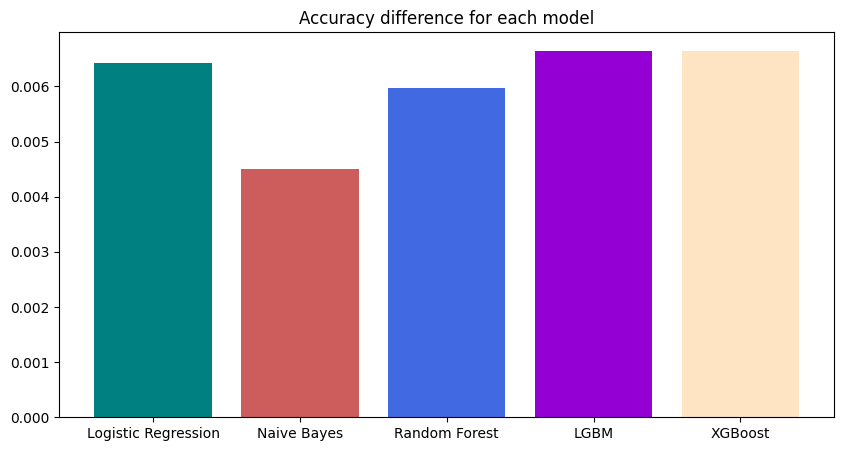

In [ ]:
col = avg_accuracy.keys()
val = [i-0.96 for i in avg_accuracy.values()]

print(avg_accuracy)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(col, val, color=['teal', 'indianred', 'royalblue', 'darkviolet', 'bisque'])
ax.set_title('Accuracy difference for each model')
plt.show()

**OBSERVACIONES:**
* Todas los accuracy son muy buenos siendo el modelo que obtuvo el mayor valor promedio el XGBOOST.

**COMPARACIÓN DE PRECISION**

La precisión es una métrica utilizada para evaluar el rendimiento de un modelo de clasificación. Se define como la relación entre las predicciones positivas verdaderas y el número total de predicciones positivas. En otras palabras, la precisión mide cuántas de las predicciones positivas realizadas por el modelo son realmente correctas.
La precisión es particularmente útil cuando el costo de los falsos positivos es alto.
La precisión se calcula utilizando la siguiente fórmula:

![](https://tse2.mm.bing.net/th?id=OIP.7yJ3DuGyhwp0x-pjKjJJpgHaBx&pid=Api&P=0)

In [ ]:
import numpy as np
precisions = [bestPrecision_logReg, bestPrecision_nb, bestPrecision_rf, bestPrecision_lbgm, bestPrecision_xgb]
labels = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'LGBM', 'XGBoost']

avg_precision = {}
for i, j in zip(labels, precisions):
    accuracy_sum = sum(j.values())
    avg_precision[i] = np.mean(list(j.values()))

print(avg_precision)

{'Logistic Regression': 0.2601817140611041, 'Naive Bayes': 0.2283066282361098, 'Random Forest': 0.19274691513218095, 'LGBM': 0.27381512392265756, 'XGBoost': 0.2795219963588116}


{'Logistic Regression': 0.2601817140611041, 'Naive Bayes': 0.2283066282361098, 'Random Forest': 0.19274691513218095, 'LGBM': 0.27381512392265756, 'XGBoost': 0.2795219963588116}


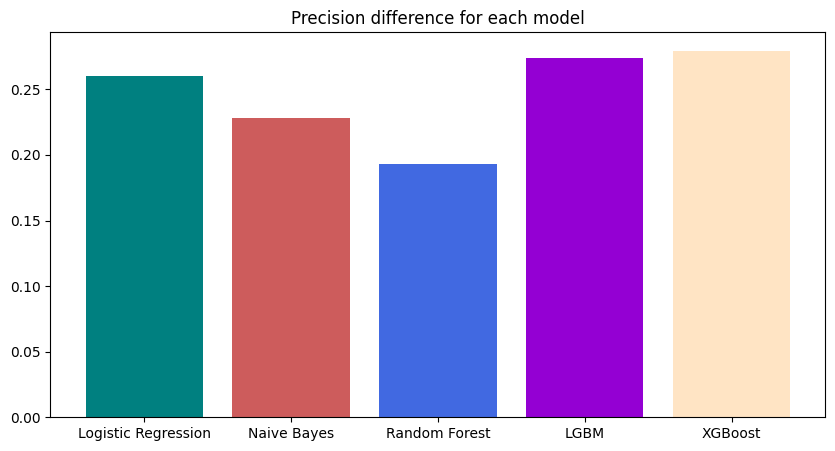

In [ ]:
col = avg_precision.keys()
val = avg_precision.values()

print(avg_precision)

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(col, val, color=['teal', 'indianred', 'royalblue', 'darkviolet', 'bisque'])
ax.set_title('Precision difference for each model')
plt.show()

**OBSERVACIONES:**
* El mayor valor promedio de precision se obtiene con el modelo XGBOOST.

**SE GRAFICA EL TIEMPO QUE TARDA CADA ALGORITMO EN EJECUTARSE**

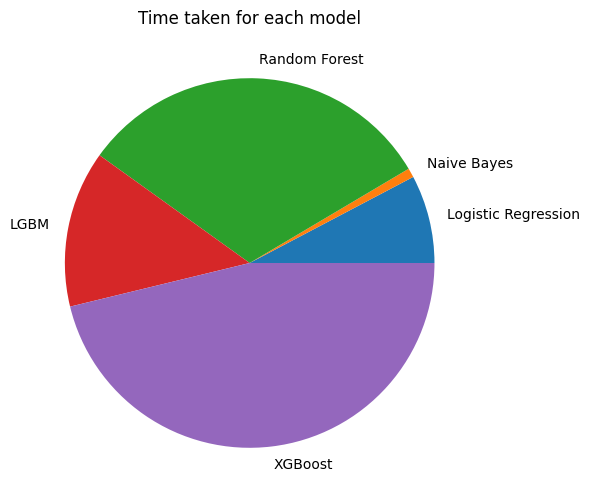

In [ ]:
labels = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'LGBM', 'XGBoost']
time = [293.07, 30.64, 1200.19, 520.71, 1756.24]
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(time, labels=labels)
ax.set_title('Time taken for each model')
plt.show()

**OBSERVACIONES:**
* Random Forest tuvo el mayor tiempo de ejecución.
* Naive bayes tiene solo 1 parámetro para sintonizar, aún así se ejecutó en el menor tiempo.
* LGBM tiene 1 parámetro más para sintonizar que Random Forest, pero tomó menos tiempo que el mismo.
* En general, se puede ver que los modelos basados en árboles (Random Forest, LGBM y XGBoost) tardaron más tiempo en entrenar que los modelos lineales (regresión logística y Naive Bayes). 

In [ ]:
MatrizDecision = pd.DataFrame({'Accuracy': [0.9664, 0.9645, 0.9660, 0.9666,0.9667],
                   'Precision': [0.2602, 0.2283, 0.1927,0.2738,0.2795],
                   'Tiempo ejecución': [293.07, 30.64, 1200.19, 520.71, 1756.24]
                   })
MatrizDecision.index = ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'LGBM', 'XGBoost']

print(MatrizDecision)

                     Accuracy  Precision  Tiempo ejecución
Logistic Regression    0.9664     0.2602            293.07
Naive Bayes            0.9645     0.2283             30.64
Random Forest          0.9660     0.1927           1200.19
LGBM                   0.9666     0.2738            520.71
XGBoost                0.9667     0.2795           1756.24


**Observaciones:**

La matriz proporcionada presenta los resultados de varios modelos de clasificación, evaluados en términos de accuracy, precisión y tiempo de ejecución.

En términos de accuracy, los modelos XGBoost y Random Forest obtienen los valores más altos con 96.67% y 96.60%, respectivamente, lo que indica que son los modelos más precisos en la clasificación de los datos de prueba. Sin embargo, es importante tener en cuenta que un accuracy alto no siempre indica un modelo óptimo, ya que puede estar sobreajustado y no generalizar bien en nuevos datos.

En cuanto a la precisión, los modelos XGBoost y Random Forest obtienen los valores más altos de 0.2795 y 0.2738, respectivamente, lo que significa que son más precisos en la identificación de verdaderos positivos.

En términos de tiempo de ejecución, el modelo Naive Bayes parece ser el más rápido con un tiempo de ejecución de 30.64 segundos, seguido por Logistic Regression y LGBM con tiempos de ejecución de 293.07 y 520.71 segundos, respectivamente. Por otro lado, Random Forest y XGBoost tienen tiempos de ejecución más largos, de 1200.19 y 1756.24 segundos, respectivamente.

En conclusión, se puede afirmar que los modelos XGBoost y Random Forest son los más precisos en la clasificación de los datos de prueba, aunque el tiempo de ejecución es más largo que los otros modelos. Por otro lado, el modelo Naive Bayes es el más rápido, pero tiene una precisión y precisión relativamente bajas en comparación con los otros modelos. Por lo tanto, la elección del modelo dependerá de la priorización de la precisión o el tiempo de ejecución en el contexto específico de la aplicación.

**Basándonos en las observaciones obtenidas al evaluar los 5 modelos, hemos decidido utilizar dos modelos diferentes para realizar las predicciones y analizar en mayor detalle su performance: Multinomial Naive Bayes y XGBoost.**

* **El modelo Multinomial Naive Bayes se eligió debido a su menor tiempo de ejecución en comparación con otros modelos evaluados. Sin embargo, se observó que este modelo tenía valores más bajos de accuracy y precision en comparación con otros modelos. Aunque este modelo puede no ser el más preciso, su velocidad de ejecución lo hace adecuado para aplicaciones en tiempo real donde el tiempo de respuesta es crítico.**

* **El modelo XGBoost se eligió debido a sus mejores valores de accuracy y precision en comparación con otros modelos. Sin embargo, se observó que este modelo tuvo el mayor tiempo de ejecución en comparación con otros modelos. Este modelo es útil cuando la precisión es crítica y no hay limitaciones en el tiempo de respuesta.**

> # **6. 2 MULTINOMIAL NAIVE BAYES**
![](https://static.thenounproject.com/png/1503819-200.png)

In [ ]:
clientes_modelado=pd.read_csv('clientes_modelado.csv', header=0)
clientes_modelado.head()

,fecha_dato,ncodpers,ind_empleado,sexo,age,fecha_alta,ind_nuevo,indrel,indrel_1mes,tiprel_1mes,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,20150128.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,20150228.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,20150328.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,20150428.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,20150528.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,1


In [ ]:
clientes_modelado.drop(columns=['fecha_dato'],inplace = True)

In [ ]:
#se selecciona el 70% de las filas del dataset original, es decir, se está realizando una reducción del tamaño del dataset original 
#para poder trabajar con una muestra más pequeña y eficiente.
clientes_modelado=clientes_modelado.sample(frac=0.7)

In [ ]:
clientes_modelado.columns

Index(['ncodpers', 'ind_empleado', 'sexo', 'age', 'fecha_alta', 'ind_nuevo',
       'indrel', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'canal_entrada', 'indfall', 'ind_actividad_cliente', 'renta',
       'segmento', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1'],
      dtype='object')

**TRAIN-TEST SPLIT**

In [ ]:
X = clientes_modelado.iloc[:,0:16] #variables independientes
Y = clientes_modelado.iloc[:,16:38]    #target variable

In [ ]:
from sklearn.model_selection import train_test_split
#La función train_test_split se configura para que se utilice el 20% de los datos como conjunto de prueba (test_size=0.2) 
#y se fija la semilla aleatoria (random_state) en 42 para asegurar que los resultados sean reproducibles.
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=42) 

**Para identificar qué productos podrían ser comprados por los clientes, se utilizó un clasificador de etiquetas múltiples, ya que se tenían varias variables objetivo. Para hacer predicciones, se transformó el conjunto de datos de múltiples etiquetas en un conjunto de datos de una sola etiqueta, ya que los conjuntos de datos y los problemas de una sola etiqueta son más legibles por máquina y facilitan la construcción del modelo. Se utilizó la técnica de Relevancia Binaria, que divide los problemas de múltiples etiquetas en problemas únicos de una sola clase. En otras palabras, se transformó un problema de clasificación de múltiples etiquetas con N etiquetas en N problemas de clasificación binaria separados de una sola etiqueta utilizando el mismo clasificador base. El resultado de la predicción es la unión de todos los clasificadores de una sola etiqueta.
Se eligió MultinomialNB() como el método del algoritmo Naive Bayes utilizado para la clasificación, ya que se demostró que este algoritmo funciona bien para problemas de clasificación con múltiples clases, como el que se tenía en este caso.**

In [ ]:
# Create a Binary Relevance classifier using MultinomialNB algorithm for multi-class classification
bin_rel_classifier = BinaryRelevance(MultinomialNB())

# The classifier cannot handle negative values, so we need to modify the instances of the _change function
# Where a product has been dropped from the value -1 to 0, limiting us from three dimensions (dropped, unchanged, added)
# to two dimensions (unchanged or dropped, added)

# Fit the model
bin_rel_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bin_rel_classifier.predict(X_test)

# Convert the sparse matrix to a dense array and create a Pandas dataframe from it
y_pred = pd.DataFrame(y_pred.toarray())


/usr/local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/sit

In [ ]:
#evaluate the model with accuracy and precision score for the test set
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Create a dataframe to store the scores
scores = pd.DataFrame(columns = ['Product','Accuracy','Precision'])
products = ['ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1']

scores["Product"] = products

# Calculate the metrics for all classes at once
for i in range(22):
  scores["Precision"][i] = precision_score(y_test.iloc[:,i],y_pred.iloc[:,i])

for i in range(22):
  scores["Accuracy"][i] = accuracy_score(y_test.iloc[:,i],y_pred.iloc[:,i])

# Print the scores dataframe
scores

,Product,Accuracy,Precision
0,ind_cco_fin_ult1,0.603317,0.747001
1,ind_cder_fin_ult1,0.671601,0.000766
2,ind_cno_fin_ult1,0.518281,0.042061
3,ind_ctju_fin_ult1,0.624303,0.006532
4,ind_ctma_fin_ult1,0.455945,0.008379
5,ind_ctop_fin_ult1,0.80271,0.376729
6,ind_ctpp_fin_ult1,0.625582,0.039346
7,ind_deco_fin_ult1,0.51643,0.002359
8,ind_deme_fin_ult1,0.660905,0.003068
9,ind_dela_fin_ult1,0.632736,0.057614


El classification report es una herramienta que se utiliza para evaluar el rendimiento de un modelo de clasificación. Proporciona información sobre varias métricas que se utilizan para evaluar la precisión y la exhaustividad del modelo, así como la capacidad del modelo para identificar correctamente cada clase.
El reporte de clasificación incluye cuatro métricas principales: precisión, recall, f1-score y support.
* **Precisión (precision)** es la proporción de predicciones positivas que son verdaderas positivas, es decir, la proporción de verdaderos positivos (TP) sobre la suma de verdaderos positivos y falsos positivos (FP). Indica la calidad de las predicciones positivas del modelo.
* **Recall (también conocido como sensitividad o exhaustividad)** mide la proporción de verdaderos positivos que fueron identificados correctamente por el modelo, es decir, la proporción de verdaderos positivos sobre la suma de verdaderos positivos y falsos negativos (FN). Indica la capacidad del modelo para identificar correctamente cada clase.
* **F1-score** es una medida ponderada de precisión y recall, que se calcula como la media armónica de ambas métricas. Es útil cuando queremos tener en cuenta ambas métricas a la hora de evaluar el rendimiento del modelo.
* **Support** indica el número de observaciones que pertenecen a cada clase.

Además de estas métricas, el classification report también proporciona una medida de precisión global del modelo, conocida como la media ponderada de f1-score. Esta métrica se calcula como la media ponderada del f1-score de cada clase, donde la ponderación se realiza por el número de observaciones de cada clase.

In [ ]:
from sklearn.metrics import classification_report
# Generar informe de clasificación
classification_report = classification_report(y_test, y_pred, target_names=products)

# Mostrar el informe de clasificación en un formato legible
print("Informe de clasificación:\n\n", classification_report)

Informe de clasificación:

                    precision    recall  f1-score   support

 ind_cco_fin_ult1       0.75      0.63      0.69   1225924
ind_cder_fin_ult1       0.00      0.74      0.00       614
 ind_cno_fin_ult1       0.04      0.49      0.08     74809
ind_ctju_fin_ult1       0.01      0.75      0.01      5911
ind_ctma_fin_ult1       0.01      0.50      0.02     16363
ind_ctop_fin_ult1       0.38      0.92      0.53    221515
ind_ctpp_fin_ult1       0.04      0.48      0.07     55066
ind_deco_fin_ult1       0.00      0.66      0.00      3102
ind_deme_fin_ult1       0.00      0.74      0.01      2518
ind_dela_fin_ult1       0.06      0.62      0.11     62738
ind_ecue_fin_ult1       0.08      0.52      0.13    107553
ind_fond_fin_ult1       0.03      0.72      0.05     21356
 ind_hip_fin_ult1       0.01      0.89      0.01      3874
ind_plan_fin_ult1       0.01      0.81      0.03      8937
ind_pres_fin_ult1       0.01      0.76      0.01      4339
ind_reca_fin_ult1       0.0

/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Overall test-accuracy across all products: ", round(scores.Accuracy.mean(), 3))
print("Overall test-precision across all products: ", round(scores.Precision.mean(), 3))

Overall test-accuracy across all products:  0.621
Overall test-precision across all products:  0.077


In [ ]:
# Accuracy top 3 
sorted_scores = scores.sort_values(by='Accuracy', ascending=False)
top_3 = sorted_scores.head(3)
print(top_3)
print(f"Mean top 3 accuracy: {top_3['Accuracy'].mean()}") 

              Product  Accuracy Precision
5   ind_ctop_fin_ult1   0.80271  0.376729
12   ind_hip_fin_ult1  0.715549  0.006707
18   ind_viv_fin_ult1  0.714523  0.008543
Mean top 3 accuracy: 0.7442605395290434


In [ ]:
# Precision top 3 
sorted_scores_p = scores.sort_values(by='Precision', ascending=False)
top_3 = sorted_scores_p.head(3)
print(top_3)
print(f"Mean top 3 precision: {top_3['Precision'].mean()}") 

              Product  Accuracy Precision
0    ind_cco_fin_ult1  0.603317  0.747001
5   ind_ctop_fin_ult1   0.80271  0.376729
21    ind_recibo_ult1  0.574488  0.102226
Mean top 3 precision: 0.40865225128020577


# **6.2.1 EVALUACIÓN DE MÉTRICAS OBTENIDAS**

Se ha ejecutado el modelo con los valores predeterminados para evaluar su rendimiento. Aunque el modelo muestra un accuracy general del 0.62 al predecir cada producto, su precisión es muy baja, alcanzando solo el 0.08. Sin embargo, nuestro objetivo es recomendar los productos con la mayor probabilidad de ser comprados y, por lo tanto, la métrica de evaluación será la precisión. Es importante tener en cuenta que las probabilidades de compra suelen ser muy bajas y, por lo tanto, la precisión media de los tres productos principales es baja (0.4086). Seguiremos trabajando en la hiperafinación de los parámetros para encontrar un modelo más preciso y adecuado a nuestro objetivo.

# **6.2.2. Ajuste de hiperparámetros para mejorar el modelo**

Para mejorar el rendimiento de nuestro modelo, hemos utilizado la técnica de ajuste de hiperparámetros GridSearchCV. Esta técnica nos permite buscar la combinación óptima de valores de hiperparámetros para nuestro modelo.

GridSearchCV realiza una búsqueda exhaustiva de los valores óptimos para los hiperparámetros especificados. Para ello, se proporciona una cuadrícula de valores de parámetros y se realiza una búsqueda de todas las posibles combinaciones de valores en la cuadrícula. El algoritmo devuelve entonces el conjunto de valores de parámetros que produce el mejor rendimiento según una métrica de evaluación.

La variable best_params_ de GridSearchCV nos proporciona la combinación de hiperparámetros que resulta en el mejor rendimiento de acuerdo con nuestra puntuación con los datos de prueba, ya que evalúa cada combinación posible. De esta manera, podemos estar seguros de que estamos utilizando la configuración óptima de hiperparámetros para nuestro modelo y, por lo tanto, maximizando su rendimiento.

In [ ]:
#Este código utiliza GridSearchCV para ajustar los parámetros de un modelo MultinomialNB y encontrar el mejor valor de alpha para mejorar la precisión ponderada del modelo. 
#También utiliza validación cruzada con 10 pliegues (cv=10) para reducir el posible sobreajuste. 
#La puntuación utilizada para evaluar el modelo es precision_weighted, que es una medida que tiene en cuenta el desequilibrio en la distribución de clases en los datos. 
#Finalmente, el código imprime los mejores parámetros encontrados y la mejor puntuación obtenida.

# Importar la clase GridSearchCV de scikit-learn
from sklearn.model_selection import GridSearchCV

# Definir una lista de parámetros para ajustar el modelo
parameters = [
    {
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.3, 0.5, 0.7, 1.0], # Ajustar el suavizado del modelo
    }
]

# Crear un objeto GridSearchCV y ajustar el modelo con los parámetros definidos
classifier_gridsearch = GridSearchCV(BinaryRelevance(), parameters, scoring='precision_weighted', cv=10)
classifier_gridsearch.fit(X_train, y_train)

# Imprimir los mejores parámetros y la mejor puntuación obtenida
print("Los mejores parámetros encontrados son:", classifier_gridsearch.best_params_)
print("La mejor puntuación obtenida es:", classifier_gridsearch.best_score_)

# Obtener el mejor valor de alpha encontrado
best_a = classifier_gridsearch.best_params_["classifier__alpha"]

/usr/local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/sit

Los mejores parámetros encontrados son: {'classifier': MultinomialNB(alpha=0.3), 'classifier__alpha': 0.3}
La mejor puntuación obtenida es: 0.4773484056603734


In [ ]:
best_a

0.3

**Se vuelve a entrenar el modelo con los mejores hiperpatametros encontrados**

In [ ]:
# Create a Binary Relevance classifier using MultinomialNB algorithm for multi-class classification
bin_rel_classifier = BinaryRelevance(MultinomialNB(alpha=best_a))

# The classifier cannot handle negative values, so we need to modify the instances of the _change function
# Where a product has been dropped from the value -1 to 0, limiting us from three dimensions (dropped, unchanged, added)
# to two dimensions (unchanged or dropped, added)

# Fit the model
bin_rel_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bin_rel_classifier.predict(X_test)

# Convert the sparse matrix to a dense array and create a Pandas dataframe from it
y_pred = pd.DataFrame(y_pred.toarray())

/usr/local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/sit

In [ ]:
#evaluate the model with accuracy and precision score for the test set
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Create a dataframe to store the scores
scores = pd.DataFrame(columns = ['Product','Accuracy','Precision'])
products = ['ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1']

scores["Product"] = products

# Calculate the metrics for all classes at once
for i in range(22):
  scores["Precision"][i] = precision_score(y_test.iloc[:,i],y_pred.iloc[:,i])

for i in range(22):
  scores["Accuracy"][i] = accuracy_score(y_test.iloc[:,i],y_pred.iloc[:,i])

# Print the scores dataframe
scores

,Product,Accuracy,Precision
0,ind_cco_fin_ult1,0.603317,0.747001
1,ind_cder_fin_ult1,0.671601,0.000766
2,ind_cno_fin_ult1,0.518281,0.042061
3,ind_ctju_fin_ult1,0.624303,0.006532
4,ind_ctma_fin_ult1,0.455945,0.008379
5,ind_ctop_fin_ult1,0.80271,0.376729
6,ind_ctpp_fin_ult1,0.625582,0.039346
7,ind_deco_fin_ult1,0.51643,0.002359
8,ind_deme_fin_ult1,0.660905,0.003068
9,ind_dela_fin_ult1,0.632736,0.057614


In [ ]:
from sklearn.metrics import classification_report
# Generar informe de clasificación
classification_report = classification_report(y_test, y_pred, target_names=products)

# Mostrar el informe de clasificación en un formato legible
print("Informe de clasificación:\n\n", classification_report)

Informe de clasificación:

                    precision    recall  f1-score   support

 ind_cco_fin_ult1       0.75      0.63      0.69   1225924
ind_cder_fin_ult1       0.00      0.74      0.00       614
 ind_cno_fin_ult1       0.04      0.49      0.08     74809
ind_ctju_fin_ult1       0.01      0.75      0.01      5911
ind_ctma_fin_ult1       0.01      0.50      0.02     16363
ind_ctop_fin_ult1       0.38      0.92      0.53    221515
ind_ctpp_fin_ult1       0.04      0.48      0.07     55066
ind_deco_fin_ult1       0.00      0.66      0.00      3102
ind_deme_fin_ult1       0.00      0.74      0.01      2518
ind_dela_fin_ult1       0.06      0.62      0.11     62738
ind_ecue_fin_ult1       0.08      0.52      0.13    107553
ind_fond_fin_ult1       0.03      0.72      0.05     21356
 ind_hip_fin_ult1       0.01      0.89      0.01      3874
ind_plan_fin_ult1       0.01      0.81      0.03      8937
ind_pres_fin_ult1       0.01      0.76      0.01      4339
ind_reca_fin_ult1       0.0

/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Overall test-accuracy across all products: ", scores.Accuracy.mean().round(3))
print("Overall test-precision across all products: ", scores.Precision.mean().round(3))

Overall test-accuracy across all products:  0.621
Overall test-precision across all products:  0.077


In [ ]:
# Accuracy top 3 
sorted_scores = scores.sort_values(by='Accuracy', ascending=False)
top_3 = sorted_scores.head(3)
print(top_3)
print(f"Mean top 3 accuracy: {top_3['Accuracy'].mean()}") 

              Product  Accuracy Precision
5   ind_ctop_fin_ult1   0.80271  0.376729
12   ind_hip_fin_ult1  0.715549  0.006707
18   ind_viv_fin_ult1  0.714523  0.008543
Mean top 3 accuracy: 0.7442605395290434


In [ ]:
# Precision top 3 
sorted_scores_p = scores.sort_values(by='Precision', ascending=False)
top_3 = sorted_scores_p.head(3)
print(top_3)
print(f"Mean top 3 precision: {top_3['Precision'].mean()}") 

              Product  Accuracy Precision
0    ind_cco_fin_ult1  0.603317  0.747001
5   ind_ctop_fin_ult1   0.80271  0.376729
21    ind_recibo_ult1  0.574488  0.102226
Mean top 3 precision: 0.40865225128020577


In [ ]:
MatrizDecision = pd.DataFrame({'Overall test_accuracy': [0.621, 0.621],
                   'Overall test_precision': [0.077, 0.077],
                   'Mean top 3 accuracy': [0.7442, 0.7443],
                   'Mean top 3 precision': [0.4086, 0.4087]
                   })
MatrizDecision.index = ['Naive Bayes con parámetros predeterminados', 'Naive Bayes con hiperparámetros']

print(MatrizDecision)

                                            Overall test_accuracy   
Naive Bayes con parámetros predeterminados                  0.621  \
Naive Bayes con hiperparámetros                             0.621   

                                            Overall test_precision   
Naive Bayes con parámetros predeterminados                   0.077  \
Naive Bayes con hiperparámetros                              0.077   

                                            Mean top 3 accuracy   
Naive Bayes con parámetros predeterminados               0.7442  \
Naive Bayes con hiperparámetros                          0.7443   

                                            Mean top 3 precision  
Naive Bayes con parámetros predeterminados                0.4086  
Naive Bayes con hiperparámetros                           0.4087  


**ANÁLISIS MODELO OPTIMIZADO**

**Después de optimizar nuestro modelo con el objetivo de aumentar su precisión, hemos observado una mejora mínima en el rendimiento general del modelo. A pesar de identificar los 3 productos con la mayor precisión, estos valores siguen siendo muy bajos, con un promedio de solo 0.409. Dado que los resultados no son satisfactorios, concluimos que este modelo no es adecuado para nuestras necesidades y exploraremos otros algoritmos estudiados para encontrar uno más efectivo.**

**Después de encontrar que el rendimiento del modelo Naive Bayes no cumplía con nuestros requisitos de precisión, hemos decidido probar con otro algoritmo que nos pueda ofrecer mejores resultados. Para ello, hemos optado por probar XGBoost, que es una implementación de árboles de decisión potenciados por gradiente diseñados especialmente para velocidad y rendimiento, lo que parece ser apropiado para nuestro problema.**


> # **6.3 XGBOOST**
![](https://cdn.educba.com/academy/wp-content/uploads/2019/06/XGBoost-Algorithm-2.jpg)

In [ ]:
clientes_modelado=pd.read_csv('clientes_modelado.csv', header=0)
clientes_modelado.head()

,fecha_dato,ncodpers,ind_empleado,sexo,age,fecha_alta,ind_nuevo,indrel,indrel_1mes,tiprel_1mes,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,20150128.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,20150228.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,20150328.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,20150428.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,20150528.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,1


In [ ]:
clientes_modelado.drop(columns=['fecha_dato'],inplace = True)

In [ ]:
#se selecciona el 70% de las filas del dataset original, es decir, se está realizando una reducción del tamaño del dataset original 
#para poder trabajar con una muestra más pequeña y eficiente.
clientes_modelado=clientes_modelado.sample(frac=0.7)

**TRAIN-TEST SPLIT**

In [ ]:
#Separate independent and dependent variables
X = clientes_modelado.iloc[:,0:16] #variables independientes
Y = clientes_modelado.iloc[:,16:38]    #target variable

from sklearn.model_selection import train_test_split

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,random_state=42)

**XGBoost es una implementación de árboles de decisión potenciados por gradiente que se ha vuelto popular en competiciones de aprendizaje automático debido a su velocidad y rendimiento. Se utiliza para problemas de clasificación y regresión, y funciona bien en conjuntos de datos grandes y complejos.
En nuestro caso, como estamos tratando de clasificar múltiples etiquetas, utilizamos la clase MultioutputClassifier de Scikit-learn, que permite ajustar un clasificador diferente para cada etiqueta. Esto significa que en lugar de tener un solo clasificador que clasifica todas las etiquetas juntas, tenemos varios clasificadores, uno para cada etiqueta. Esto puede ser especialmente útil para ampliar los clasificadores que no admiten de forma nativa la clasificación de objetivos múltiples.
En resumen, al aplicar XGBoost con MultioutputClassifier en nuestro conjunto de datos, esperamos obtener mejores resultados en términos de precisión y rendimiento que con nuestro modelo anterior.**

In [ ]:
# Ajuste del modelo XGBoost con MultiOutputClassifier y parámetros predeterminados
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier

xgboost_classifier = MultiOutputClassifier(estimator=XGBClassifier())

print("Ajustando el modelo XGBoost...")
xgboost_classifier.fit(X_train, y_train)
print("El modelo ha sido ajustado exitosamente.")

Ajustando el modelo XGBoost...
El modelo ha sido ajustado exitosamente.


In [ ]:
# Realizar predicciones sobre los datos de entrenamiento
y_train_pred_xgb = xgboost_classifier.predict(X_train)

# Convertir las predicciones a un DataFrame de pandas
y_train_pred_xgb = pd.DataFrame(y_train_pred_xgb, columns=y_train.columns)

# Comprobar que las dimensiones son correctas
print("Dimensiones de y_train_pred_xgb:", y_train_pred_xgb.shape)

Dimensiones de y_train_pred_xgb: (7186560, 22)


In [ ]:
y_train_pred_xgb

,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186555,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7186556,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7186557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7186558,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_pred = pd.DataFrame(xgboost_classifier.predict(X_test))

In [ ]:
y_pred

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1796637,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1796638,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1796639,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a dataframe to store the scores
scores = pd.DataFrame(columns = ['Product','Accuracy','Precision'])
products = ['ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1']
scores["Product"] = products

# Calculate the metrics for all classes at once
for i in range(22):
  scores["Precision"][i] = precision_score(y_train.iloc[:,i],y_train_pred_xgb.iloc[:,i])

for i in range(22):
  scores["Accuracy"][i] = accuracy_score(y_train.iloc[:,i],y_train_pred_xgb.iloc[:,i])

# Print the scores dataframe
scores

,Product,Accuracy,Precision
0,ind_cco_fin_ult1,0.773949,0.80987
1,ind_cder_fin_ult1,0.999751,0.992565
2,ind_cno_fin_ult1,0.954084,0.817844
3,ind_ctju_fin_ult1,0.999836,0.981554
4,ind_ctma_fin_ult1,0.992642,0.729721
5,ind_ctop_fin_ult1,0.901637,0.640403
6,ind_ctpp_fin_ult1,0.97212,0.647338
7,ind_deco_fin_ult1,0.998346,0.692992
8,ind_deme_fin_ult1,0.99882,0.988636
9,ind_dela_fin_ult1,0.972227,0.655142


In [ ]:
print("Overall train_accuracy across all products: ", scores.Accuracy.mean().round(3))
print("Overall train_precision across all products: ", scores.Precision.mean().round(3))

Overall train_accuracy across all products:  0.967
Overall train_precision across all products:  0.835


In [ ]:
from sklearn.metrics import classification_report
# Generar informe de clasificación
classification_report = classification_report(y_test, y_pred, target_names=products)

# Mostrar el informe de clasificación en un formato legible
print("Informe de clasificación:\n\n", classification_report)

Informe de clasificación:

                    precision    recall  f1-score   support

 ind_cco_fin_ult1       0.81      0.87      0.84   1219101
ind_cder_fin_ult1       1.00      0.21      0.35       575
 ind_cno_fin_ult1       0.79      0.01      0.01     83416
ind_ctju_fin_ult1       0.98      0.97      0.97      5999
ind_ctma_fin_ult1       0.71      0.28      0.40     16187
ind_ctop_fin_ult1       0.64      0.43      0.52    218352
ind_ctpp_fin_ult1       0.64      0.26      0.37     56603
ind_deco_fin_ult1       0.54      0.03      0.07      3121
ind_deme_fin_ult1       0.94      0.06      0.11      2296
ind_dela_fin_ult1       0.65      0.29      0.40     57853
ind_ecue_fin_ult1       0.66      0.15      0.24    104441
ind_fond_fin_ult1       0.88      0.02      0.03     18237
 ind_hip_fin_ult1       0.92      0.14      0.24      4164
ind_plan_fin_ult1       0.94      0.07      0.14      8188
ind_pres_fin_ult1       0.91      0.47      0.62      4234
ind_reca_fin_ult1       0.8

/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Create a dataframe to store the scores
scores = pd.DataFrame(columns = ['Product','Accuracy','Precision'])
products = ['ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1']
scores["Product"] = products

# Calculate the metrics for all classes at once
for i in range(22):
  scores["Precision"][i] = precision_score(y_test.iloc[:,i],y_pred.iloc[:,i])

for i in range(22):
  scores["Accuracy"][i] = accuracy_score(y_test.iloc[:,i],y_pred.iloc[:,i])

# Print the scores dataframe
scores

,Product,Accuracy,Precision
0,ind_cco_fin_ult1,0.772892,0.808992
1,ind_cder_fin_ult1,0.999747,1.0
2,ind_cno_fin_ult1,0.953802,0.791842
3,ind_ctju_fin_ult1,0.999804,0.975417
4,ind_ctma_fin_ult1,0.992495,0.711052
5,ind_ctop_fin_ult1,0.901259,0.638531
6,ind_ctpp_fin_ult1,0.972102,0.641361
7,ind_deco_fin_ult1,0.998272,0.539604
8,ind_deme_fin_ult1,0.99879,0.942029
9,ind_dela_fin_ult1,0.971985,0.646786


In [ ]:
print("Overall test_accuracy across all products: ", scores.Accuracy.mean().round(3))
print("Overall test_precision across all products: ", scores.Precision.mean().round(3))

Overall test_accuracy across all products:  0.967
Overall test_precision across all products:  0.809


In [ ]:
# Accuracy top 3 
sorted_scores = scores.sort_values(by='Accuracy', ascending=False)
top_3 = sorted_scores.head(3)
print(top_3)
print(f"Mean top 3 accuracy: {top_3['Accuracy'].mean()}") 

             Product  Accuracy Precision
3  ind_ctju_fin_ult1  0.999804  0.975417
1  ind_cder_fin_ult1  0.999747       1.0
8  ind_deme_fin_ult1   0.99879  0.942029
Mean top 3 accuracy: 0.9994469308745227


In [ ]:
# Precision top 3 
sorted_scores_p = scores.sort_values(by='Precision', ascending=False)
top_3 = sorted_scores_p.head(3)
print(top_3)
print(f"Mean top 3 precision: {top_3['Precision'].mean()}") 

              Product  Accuracy Precision
1   ind_cder_fin_ult1  0.999747       1.0
3   ind_ctju_fin_ult1  0.999804  0.975417
18   ind_viv_fin_ult1  0.997227  0.969697
Mean top 3 precision: 0.9817045688404503


# **6.3.1 EVALUACIÓN DE MÉTRICAS OBTENIDAS**

Es evidente que el modelo XGBoost ha demostrado una mejora significativa en términos de precisión en comparación con el primer modelo, incluso utilizando la configuración predeterminada. No solo ha aumentado la precisión general, sino también el accuracy, alcanzando valores de 0.81 y 0.97, respectivamente. Sin embargo, lo que más nos interesa es la precisión en el top 3, la cual ha mejorado considerablemente con un valor de 0,98. Además, el accuracy en los productos más recomendados también ha aumentado significativamente, alcanzando aproximadamente un 0.99. Esto nos permite afirmar con confianza que este modelo es una herramienta útil para recomendar con gran precisión los tres mejores productos a un cliente, lo que puede ser de gran ayuda para Santander en el próximo mes.
No obstante, todavía tenemos la oportunidad de mejorar el rendimiento de nuestro modelo mediante el hiperajuste, lo cual puede resultar en una precisión aún mayor.

# **6.3.2 Ajuste de hiperparámetros para mejorar el modelo**

Para mejorar aún más la precisión de nuestro modelo XGBoost, hemos implementado una técnica de optimización de hiperparámetros llamada GridSearch. Esta técnica se utiliza para recorrer sistemáticamente todas las combinaciones posibles de valores de hiperparámetros y encontrar la combinación óptima que produce los mejores resultados.
Al utilizar GridSearch, podemos reducir significativamente el tiempo y la complejidad de la tarea de ajustar los hiperparámetros de nuestro modelo, ya que nos permite automatizar el proceso de búsqueda y selección de la mejor combinación de parámetros.
Este enfoque nos permitirá obtener una mejor precisión en la clasificación de múltiples etiquetas en nuestro conjunto de datos, lo que puede ser especialmente útil para nuestro objetivo de recomendar los tres mejores productos a un cliente con gran precisión en el próximo mes.
En resumen, la implementación de GridSearch en nuestro modelo XGBoost es una estrategia clave para mejorar la eficiencia y precisión de nuestro proceso de ajuste de hiperparámetros, y puede ayudarnos a lograr mejores resultados en la clasificación de múltiples etiquetas y en la recomendación de productos a nuestros clientes. 
Vamos a utilizar este método para encontrar el mejor modelo y obtener aún mejores resultados en la clasificación de múltiples etiquetas en nuestro conjunto de datos.

In [ ]:
clientes_modelado=clientes_modelado.sample(frac=0.01)

In [ ]:
#Separate independent and dependent variables
X = clientes_modelado.iloc[:,0:16] #variables independientes
Y = clientes_modelado.iloc[:,16:38]    #target variable

In [ ]:
from sklearn.model_selection import GridSearchCV
...
x_reduced = X[X.index % 2 == 0]
y_reduced = Y[Y.index % 2 == 0]

# Definimos los parámetros para hiperajustar nuestro modelo
parameters = {
    'estimator__learning_rate': [0.1, 0.2, 0.3, 0.4], # modifica la velocidad de aprendizaje
    'estimator__max_depth': [6, 9, 12, 15] # modifica la profundidad del árbol
}

# Creamos una instancia del clasificador XGBoost y lo envolvemos en el MultiOutputClassifier
xgboost_classifier = MultiOutputClassifier(estimator=XGBClassifier())

# Creamos una instancia de GridSearchCV para hiperajustar nuestro modelo
grid = GridSearchCV(
    estimator=xgboost_classifier, 
    param_grid=parameters, cv=3, n_jobs=-1, scoring="precision_weighted"
)
print("Ajustando modelo...")
# Ajustamos el modelo a nuestros datos reducidos
grid.fit(x_reduced, y_reduced)

# Obtenemos los mejores valores para los parámetros que definimos
best_learning_rate = grid.best_params_["estimator__learning_rate"] 
best_max_depth = grid.best_params_["estimator__max_depth"] 

Ajustando modelo...


/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Pr

In [ ]:
best_learning_rate = grid.best_params_["estimator__learning_rate"] 
best_max_depth = grid.best_params_["estimator__max_depth"] 
best_score = grid.best_score_

print("best_learning_rate:", best_learning_rate)
print("best_max_depth:", best_max_depth)
print("best_score:", best_score)

best_learning_rate: 0.1
best_max_depth: 9
best_score: 0.6607510295615953


In [ ]:
# Dividir los datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Entrenar un clasificador XGBoost utilizando los mejores parámetros obtenidos
xgboost_classifier = MultiOutputClassifier(estimator=XGBClassifier(learning_rate=best_learning_rate, max_depth=best_max_depth))
xgboost_classifier.fit(x_train, y_train)

# Realizar predicciones sobre los datos de entrenamiento
y_train_pred_xgb = xgboost_classifier.predict(x_train)

# Convertir las predicciones a un DataFrame de pandas
y_train_pred_xgb = pd.DataFrame(y_train_pred_xgb, columns=y_train.columns)

# Comprobar que las dimensiones son correctas
print("Dimensiones de y_train_pred_xgb:", y_train_pred_xgb.shape)
# Realizar predicciones sobre el conjunto de prueba
y_pred = pd.DataFrame(xgboost_classifier.predict(x_test))


Dimensiones de y_train_pred_xgb: (89831, 22)


In [ ]:
y_train_pred_xgb

,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89826,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89827,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89828,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89829,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_pred

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38495,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38496,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38497,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a dataframe to store the scores
scores = pd.DataFrame(columns = ['Product','Accuracy','Precision'])
products = ['ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1']
scores["Product"] = products

# Calculate the metrics for all classes at once
for i in range(22):
  scores["Precision"][i] = precision_score(y_train.iloc[:,i],y_train_pred_xgb.iloc[:,i])

for i in range(22):
  scores["Accuracy"][i] = accuracy_score(y_train.iloc[:,i],y_train_pred_xgb.iloc[:,i])

# Print the scores dataframe
scores
#overall

/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Product,Accuracy,Precision
0,ind_cco_fin_ult1,0.796585,0.825857
1,ind_cder_fin_ult1,0.999733,0.0
2,ind_cno_fin_ult1,0.958288,0.975309
3,ind_ctju_fin_ult1,0.999944,1.0
4,ind_ctma_fin_ult1,0.995347,0.9375
5,ind_ctop_fin_ult1,0.90835,0.686392
6,ind_ctpp_fin_ult1,0.978448,0.809291
7,ind_deco_fin_ult1,0.999054,1.0
8,ind_deme_fin_ult1,0.998464,1.0
9,ind_dela_fin_ult1,0.976456,0.764666


In [ ]:
print("Overall train_accuracy across all products: ", scores.Accuracy.mean().round(3))
print("Overall train_precision across all products: ", scores.Precision.mean().round(3))

Overall train_accuracy across all products:  0.97
Overall train_precision across all products:  0.887


In [ ]:
from sklearn.metrics import classification_report
# Generar informe de clasificación
classification_report = classification_report(y_test, y_pred, target_names=products)

# Mostrar el informe de clasificación en un formato legible
print("Informe de clasificación:\n\n", classification_report)

Informe de clasificación:

                    precision    recall  f1-score   support

 ind_cco_fin_ult1       0.81      0.87      0.84     26244
ind_cder_fin_ult1       0.00      0.00      0.00        11
 ind_cno_fin_ult1       0.12      0.00      0.00      1637
ind_ctju_fin_ult1       0.92      0.93      0.92       126
ind_ctma_fin_ult1       0.61      0.26      0.37       347
ind_ctop_fin_ult1       0.60      0.42      0.50      4741
ind_ctpp_fin_ult1       0.56      0.21      0.31      1208
ind_deco_fin_ult1       0.20      0.03      0.06        62
ind_deme_fin_ult1       0.00      0.00      0.00        47
ind_dela_fin_ult1       0.64      0.30      0.41      1352
ind_ecue_fin_ult1       0.61      0.13      0.21      2463
ind_fond_fin_ult1       0.57      0.01      0.02       454
 ind_hip_fin_ult1       1.00      0.03      0.06        98
ind_plan_fin_ult1       0.33      0.01      0.02       205
ind_pres_fin_ult1       0.75      0.31      0.44        87
ind_reca_fin_ult1       0.7

/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Create a dataframe to store the scores
scores = pd.DataFrame(columns = ['Product','Accuracy','Precision'])
products = ['ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1']
scores["Product"] = products

# Calculate the metrics for all classes at once
for i in range(22):
  scores["Precision"][i] = precision_score(y_test.iloc[:,i],y_pred.iloc[:,i])

for i in range(22):
  scores["Accuracy"][i] = accuracy_score(y_test.iloc[:,i],y_pred.iloc[:,i])

# Print the scores dataframe
scores

/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Product,Accuracy,Precision
0,ind_cco_fin_ult1,0.775299,0.812276
1,ind_cder_fin_ult1,0.999714,0.0
2,ind_cno_fin_ult1,0.957169,0.125
3,ind_ctju_fin_ult1,0.999506,0.92126
4,ind_ctma_fin_ult1,0.99187,0.614865
5,ind_ctop_fin_ult1,0.894753,0.60411
6,ind_ctpp_fin_ult1,0.969974,0.556277
7,ind_deco_fin_ult1,0.998234,0.2
8,ind_deme_fin_ult1,0.998779,0.0
9,ind_dela_fin_ult1,0.969506,0.640379


In [ ]:
print("Overall test_accuracy across all products: ", scores.Accuracy.mean().round(3))
print("Overall test_precision across all products: ", scores.Precision.mean().round(3))

Overall test_accuracy across all products:  0.966
Overall test_precision across all products:  0.51


In [ ]:
# Accuracy top 3 
sorted_scores = scores.sort_values(by='Accuracy', ascending=False)
top_3 = sorted_scores.head(3)
print(top_3)
print(f"Mean top 3 accuracy: {top_3['Accuracy'].mean()}") 

             Product  Accuracy Precision
1  ind_cder_fin_ult1  0.999714       0.0
3  ind_ctju_fin_ult1  0.999506   0.92126
8  ind_deme_fin_ult1  0.998779       0.0
Mean top 3 accuracy: 0.9993333333333334


In [ ]:
# Precision top 3 
sorted_scores_p = scores.sort_values(by='Precision', ascending=False)
top_3 = sorted_scores_p.head(3)
print(top_3)
print(f"Mean top 3 accuracy: {top_3['Precision'].mean()}") 

              Product  Accuracy Precision
18   ind_viv_fin_ult1  0.996727       1.0
12   ind_hip_fin_ult1  0.997532       1.0
3   ind_ctju_fin_ult1  0.999506   0.92126
Mean top 3 accuracy: 0.9737532808398951


In [ ]:
MatrizDecision = pd.DataFrame({'Overall test_accuracy across all products': [0.967, 0.966],
                   'Overall test_precision across all products': [0.81, 0.51],
                   'Mean top 3 accuracy': [0.999, 0.999],
                   'Mean top 3 precision': [0.985, 0.973]
                   })
MatrizDecision.index = ['XGBoost con parámetros predeterminados', 'XGBoost con hiperparámetros']

print(MatrizDecision)

                                        Overall test_accuracy across all products   
XGBoost con parámetros predeterminados                                      0.967  \
XGBoost con hiperparámetros                                                 0.966   

                                        Overall test_precision across all products   
XGBoost con parámetros predeterminados                                        0.81  \
XGBoost con hiperparámetros                                                   0.51   

                                        Mean top 3 accuracy   
XGBoost con parámetros predeterminados                0.999  \
XGBoost con hiperparámetros                           0.999   

                                        Mean top 3 precision  
XGBoost con parámetros predeterminados                 0.985  
XGBoost con hiperparámetros                            0.973  


**Después de realizar la GridSearch exhaustiva utilizando los parámetros seleccionados, nos encontramos con que el puntaje obtenido con los mejores parámetros no superó a los resultados obtenidos con los parámetros predeterminados. De hecho, la precisión general disminuyó a 0.51, lo que indica que los parámetros seleccionados no lograron mejorar significativamente la calidad del modelo. Además, la búsqueda de parámetros consumió un tiempo considerable, lo que afectó la eficiencia del proceso de ajuste del modelo.
Después de esta evaluación, decidimos continuar utilizando los parámetros predeterminados en nuestro modelo XGBoost. Aunque la búsqueda de parámetros no arrojó los resultados deseados, esto no significa que debamos descartar la posibilidad de utilizar parámetros personalizados en el futuro. El proceso de hiperajuste es un proceso iterativo y siempre podemos volver a examinar estos parámetros en el futuro para obtener una mayor precisión en la clasificación de múltiples etiquetas en nuestro conjunto de datos..**

# **6.3.3 Permutarion importance**


**Ahora vamos a utilizar la técnica de Permutation Importance para determinar qué características son más importantes a la hora de recomendar productos a nuestros clientes. Esta técnica consiste en evaluar el rendimiento del modelo al permutar los valores de una característica, y observar el cambio en la precisión del modelo. Cuanto mayor sea el cambio en la precisión, mayor será la importancia de esa característica.
La importancia de permutación es una técnica útil para evaluar la importancia relativa de las características en un modelo. A diferencia de otros métodos, como la importancia de la característica basada en el modelo, la importancia de permutación no se basa en la construcción de un modelo separado para cada característica. En su lugar, utiliza el modelo original y mide la importancia de cada característica a través de la aleatorización y la evaluación del rendimiento del modelo.**

In [ ]:
#Separate independent and dependent variables
X = clientes_modelado.iloc[:,0:16] #variables independientes
Y = clientes_modelado.iloc[:,16:38]    #target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

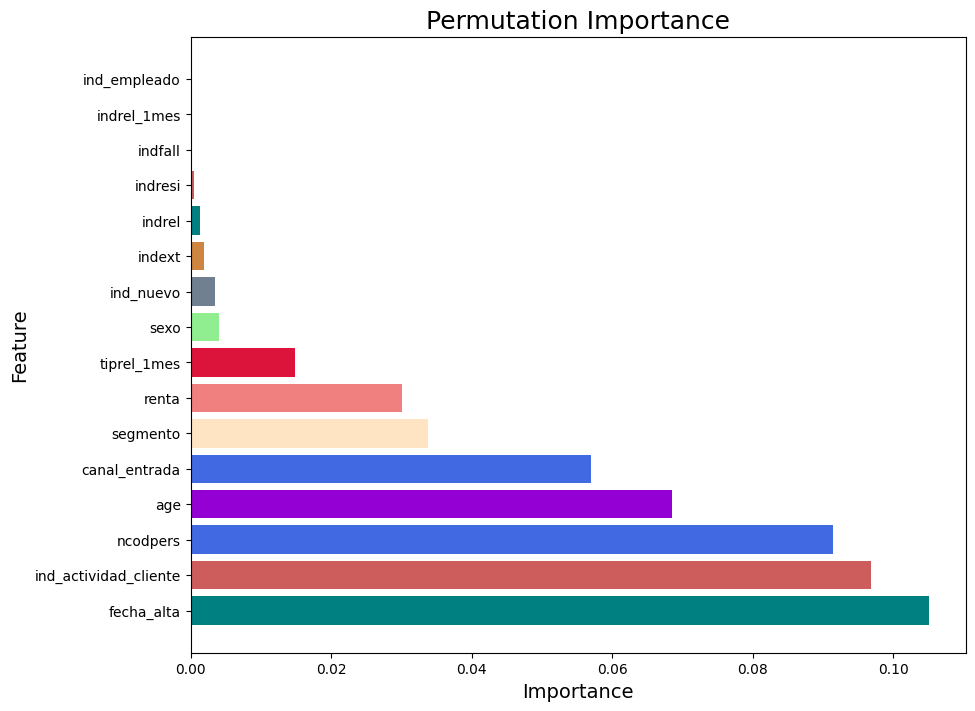

In [ ]:
# Importar la librería Permutation Importance
from sklearn.inspection import permutation_importance

# Entrenar el modelo XGBoost
xgboost_classifier = MultiOutputClassifier(estimator=XGBClassifier())
xgboost_classifier.fit(X_train, y_train)

# Realizar predicciones sobre los datos de entrenamiento
y_train_pred = xgboost_classifier.predict(X_train)
y_train_pred = pd.DataFrame(y_train_pred)

# Calcular Permutation Importance
result = permutation_importance(xgboost_classifier, X_train, y_train, n_repeats=10, random_state=42)

# Obtener la importancia de cada característica
importance = result.importances_mean

# Graficar la importancia de cada característica
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance': importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
plt.figure(figsize=(10,8))
plt.barh(importance_df['feature'], importance_df['importance'], color=['teal', 'indianred', 'royalblue', 'darkviolet','royalblue','bisque','lightcoral', 'crimson', 'lightgreen','slategray','peru'])
plt.title('Permutation Importance', fontsize=18)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

In [ ]:
importance_df

,feature,importance
4,fecha_alta,0.105017
13,ind_actividad_cliente,0.096850
0,ncodpers,0.091369
3,age,0.068553
11,canal_entrada,0.056948
15,segmento,0.033811
14,renta,0.030160
8,tiprel_1mes,0.014834
2,sexo,0.003994
5,ind_nuevo,0.003416


**Observaciones**:

El análisis de Permutation Importance en el modelo XGBoost proporciona información sobre la importancia relativa de cada variable en la predicción del resultado. En este caso, se observa que la variable más importante es "fecha_alta" con un valor de importancia de 0.105, seguida de "ind_actividad_cliente" con 0.097 y "ncodpers" con 0.091.
Es interesante notar que la fecha de alta del cliente es la característica más importante, lo que puede indicar que los clientes que se registraron hace más tiempo tienen más probabilidades de comprar nuevos productos bancarios. La actividad del cliente también es una variable importante, lo que sugiere que los clientes que tienen un historial de actividad más alto tienen más probabilidades de adquirir nuevos productos bancarios.
Otras variables importantes incluyen la edad del cliente, el canal de entrada, la segmentación y el ingreso. También se observa que hay varias variables que tienen una importancia relativamente baja en la predicción, como el sexo, la antigüedad del cliente, el estado de residencia y la tasa de reemplazo del mes anterior.
En general, el análisis de Permutation Importance proporciona información valiosa sobre qué características son más relevantes para la predicción de nuevos productos bancarios, lo que puede ser útil para desarrollar estrategias de marketing y ventas más efectivas.

> # **6.3.4 CROSS-VALIDATION**
![](https://dataaspirant.com/wp-content/uploads/2020/12/1-Cross-Validation.png)

**El paso final del planteamiento y evaluación de los modelos es analizar la generalización de estos, es decir, el comportamiento de la clasificación para diferentes divisiones de datos. Para esto, aplicamos una validación cruzada con los siguientes métodos:**

*** Holdout validate**

*** Kfold**

In [ ]:
clientes_modelado=pd.read_csv('clientes_modelado.csv', header=0)
clientes_modelado.head()

,fecha_dato,ncodpers,ind_empleado,sexo,age,fecha_alta,ind_nuevo,indrel,indrel_1mes,tiprel_1mes,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,20150128.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,20150228.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,20150328.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,20150428.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,20150528.0,1375586,3.0,0.0,35.0,20150112.0,0.0,1.0,1,0.0,...,0,0,0,0,0,0,0,0.0,0.0,1


In [ ]:
clientes_modelado.drop(columns=['fecha_dato'],inplace = True)

**Debido a que nuestro conjunto de datos es demasiado grande y la memoria de la computadora no puede permitirnos ejecutar todo el conjunto de datos, solo usamos el 30% de los datos para realizar el cross-validation.**

In [ ]:
clientes_modelado=clientes_modelado.sample(frac=0.3)

In [ ]:
X = clientes_modelado.iloc[:,0:16] #variables independientes
y = clientes_modelado.iloc[:,16:38]    #target variable

In [ ]:
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

![](https://knowledge.dataiku.com/latest/_images/holdout1.png)

**Es una técnica que implica dividir los datos en diferentes conjuntos: un conjunto para entrenamiento y otros conjuntos para validación y prueba.**

In [ ]:
from sklearn.metrics import accuracy_score

#new validation set
X_train , X_validate, y_train_hold, y_validate = train_test_split(X, y , test_size=0.1)

model = MultiOutputClassifier(estimator=XGBClassifier())

model.fit(X_train, y_train_hold)

pre = model.predict(X_validate)
accuracy_score(y_validate, pre)

0.576827177808945

![](https://knowledge.dataiku.com/latest/_images/k-fold1.png)

**La validación cruzada es un procedimiento de remuestreo que se utiliza para evaluar modelos de aprendizaje automático en una muestra de datos limitada.
El procedimiento tiene un solo parámetro llamado k que se refiere a la cantidad de grupos en los que se dividirá una muestra de datos dada. Como tal, el procedimiento a menudo se denomina validación cruzada de k-fold. Cuando se elige un valor específico para k, puede usarse en lugar de k en la referencia al modelo, como k = 10 convirtiéndose en una validación cruzada de 10 veces.
La validación cruzada se usa principalmente en el aprendizaje automático aplicado para estimar la habilidad de un modelo de aprendizaje automático en datos no vistos. Es decir, usar una muestra limitada para estimar cómo se espera que funcione el modelo en general cuando se usa para hacer predicciones sobre datos que no se usaron durante el entrenamiento del modelo.**

In [ ]:
#metodo para crossvalidation
model=MultiOutputClassifier(estimator=XGBClassifier())
CV_scores = cross_val_score(model, X, y, cv=10)

In [ ]:
#lista de todos los entrenamiento de kfold
CV_scores

array([0.56506156, 0.56315748, 0.56939141, 0.57001481, 0.56533936,
       0.57640458, 0.56666407, 0.56853425, 0.56798878, 0.57040443])

In [ ]:
print("Cross validation score es  %.5f ± %0.2f" % (CV_scores.mean(), CV_scores.std()))

Cross validation score es  0.56830 ± 0.00


El valor de 0.56830 significa que la puntuación media de validación cruzada es del 56.83%, lo que indica que el modelo está obteniendo una precisión moderada en la predicción de los datos.
La desviación estándar (± 0.00) indica la variabilidad de las puntuaciones de validación cruzada en todas las divisiones del conjunto de datos. Como la desviación estándar es muy pequeña, podemos asumir que el modelo tiene un buen rendimiento en todas las divisiones del conjunto de datos y que la puntuación media es una buena estimación del rendimiento general del modelo.

**Determinamos su underfitting u overfitting**

In [ ]:
!pip install colorama
from colorama import Fore

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [ ]:
def print_scores(model ,X_train , y_train, predictions , cv_splites=10):
    
    print(Fore.BLUE , "El promedio de score en el train es  %.5f" % model.score(X_train, y_train))

    #cross validation

    CV_scores = cross_val_score(model, X_train, y_train, cv=cv_splites)
    
    print(Fore.BLUE ,"Los scores del cross validation son: \n",CV_scores)
    print(Fore.BLACK ,"El score minimo es %.3f" % min(CV_scores))
    print(Fore.BLACK ,"El maximo score es %.3f" % max(CV_scores))
    print(Fore.BLACK ,"Cross validation score es  %.5f ± %0.2f" % (CV_scores.mean(), CV_scores.std()))
    print(Fore.RED ,"El test score es  %.5f " % accuracy_score(y,predictions))

In [ ]:
model=MultiOutputClassifier(estimator=XGBClassifier())
model.fit(X, y)

predictions = model.predict(X)
print_scores(model, X, y, predictions)

 El promedion de score en el train es  0.60279
 Los scores del cross validation son: 
 [0.56420446 0.57149536 0.56728746 0.57188498 0.56985896 0.57585911
 0.56510559 0.57266423 0.56728746 0.57040443]
 El score minimo es 0.564
 El maximo score es 0.576
 Cross validation score es  0.56961 ± 0.00
 El test score es  0.60279 


**Observaciones:**

Se observa que el modelo tiene un promedio de score en el train de 0.60279, lo cual indica que el modelo está aprendiendo de manera efectiva los patrones de los datos de entrenamiento.
En cuanto a los scores del cross validation, se observa una variación entre 0.564 y 0.576, lo que indica que el modelo puede tener cierta variabilidad en su desempeño dependiendo de los datos con los que se esté evaluando.
El score de cross validation promedio es de 0.56961 con una desviación estándar de 0.00, lo que indica que el modelo es consistente en su desempeño en diferentes subconjuntos de datos.
Por último, se observa que el score en el conjunto de test es de 0.60279, lo que indica que el modelo tiene un buen desempeño en la generalización a datos nuevos. En resumen, el modelo parece estar funcionando de manera adecuada y se está generalizando bien a datos nuevos.